In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
movies = pd.read_csv('/content/gdrive/MyDrive/SEM 7/Machine Learning/Project/Datasets/movies.csv')
print(movies)

FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/SEM 7/Machine Learning/Project/Datasets/movies.csv'

In [ ]:
movies['title'] = movies.apply(lambda x: x['title'].split(' (')[0],axis=1)
movies['genres'] = movies['genres'].str.replace('|',',')
movies.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,movieId,title,genres
0,1,Toy Story,"Adventure,Animation,Children,Comedy,Fantasy"
1,2,Jumanji,"Adventure,Children,Fantasy"
2,3,Grumpier Old Men,"Comedy,Romance"
3,4,Waiting to Exhale,"Comedy,Drama,Romance"
4,5,Father of the Bride Part II,Comedy


In [ ]:
ratings = pd.read_csv('/content/gdrive/MyDrive/SEM 7/Machine Learning/Project/Datasets/ratings.csv')
ratings.drop('timestamp',axis=1,inplace=True)
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


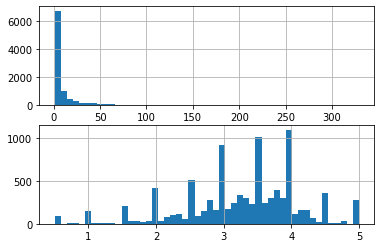

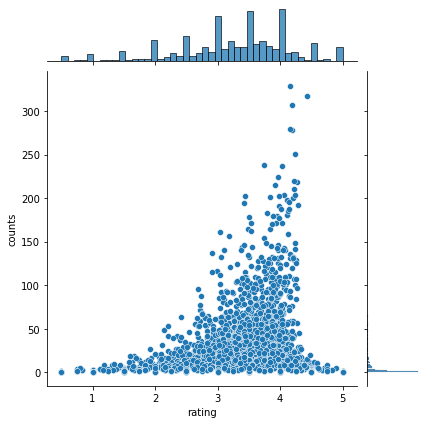

In [ ]:
movie_data = pd.merge(ratings,movies,on='movieId')
mean_ratings = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
mean_ratings['counts'] = movie_data.groupby('title')['rating'].count()

movie_by_user = movie_data.pivot_table(index='userId',columns='title',values='rating')

#Plotting graphs to study trends

plt.subplot(2,1,1)
mean_ratings['counts'].hist(bins=50)
plt.subplot(2,1,2)
mean_ratings['rating'].hist(bins=50)
movie_data = pd.merge(ratings,movies,on='movieId')
#movie_data.groupby('title')['rating'].count().sort_values(ascending=False)
#print(movie_data)

mean_ratings = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
mean_ratings['counts'] = movie_data.groupby('title')['rating'].count()

movie_by_user = movie_data.pivot_table(index='userId',columns='title',values='rating')
#print(movie_by_user)
sns.jointplot(x='rating',y='counts',data=mean_ratings)

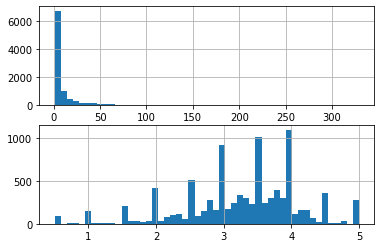

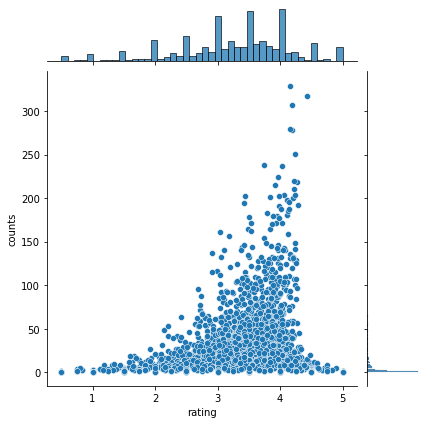

In [ ]:
#Plotting graphs to study trends

plt.subplot(2,1,1)
mean_ratings['counts'].hist(bins=50)
plt.subplot(2,1,2)
mean_ratings['rating'].hist(bins=50)
sns.jointplot(x='rating',y='counts',data=mean_ratings)

In [ ]:
mov = input('Enter your movie :')

user_ratings = movie_by_user[mov]
user_like = movie_by_user.corrwith(user_ratings)
corr_like = pd.DataFrame(user_like,columns=['Correlation'])
corr_like.dropna(inplace=True)
corr_like.sort_values(by='Correlation',ascending=False)
corr_like = corr_like.join(mean_ratings['counts'])
mtw = corr_like[corr_like['counts']>50].sort_values('Correlation',ascending=False).head(10).index.tolist()
print('We recommend the following movies : \n')
for i in mtw:
    print(i)

Enter your movie :Jumanji


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


We recommend the following movies : 

Jumanji
Notting Hill
Million Dollar Baby
Others, The
Donnie Brasco
Social Network, The
First Knight
Liar Liar
Chinatown
King's Speech, The
